In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Steps-0 : Data Load**

**The Food Access Research Atlas:**

Presents an overview of food access indicators for low-income and other census tracts using different measures of supermarket accessibility;

Provides food access data for populations within census tracts; and

Offers census-tract-level data on food access that can be downloaded for community planning or research purposes.

**Purpose:**

To offer insights into food access indicators for low-income areas and other census tracts, focusing on supermarket accessibility.

**Datasource:**  Food Access Research Atlas - https://www.ers.usda.gov/data-products/food-access-research-atlas/download-the-data/

# **Steps-1: Data Cleaning**

Load Your Data

In [3]:
data = pd.read_excel("/content/drive/MyDrive/Dataset/Food-Access-Research-Atlas-Data2019 - 1.xlsx")

Inspect the Data

In [4]:
data.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.000000,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.341014,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.000000,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.000000,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.681219,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0


In [5]:
data.shape

(72531, 147)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Columns: 147 entries, CensusTract to TractSNAP
dtypes: float64(126), int64(19), object(2)
memory usage: 81.3+ MB


Check for Missing Values

In [7]:
print(data.isnull().sum())

CensusTract      0
State            0
County           0
Urban            0
Pop2010          0
                ..
TractAIAN        4
TractOMultir     4
TractHispanic    4
TractHUNV        4
TractSNAP        4
Length: 147, dtype: int64


Fill missing values with the mean of numrical columns

In [8]:
#In the dataset, they mentioned NULL as not available. so nothing to fill o handle.

Checking for duplicate values

In [9]:
data.duplicated().sum()

0

Descriptive Statistics

In [10]:
# Descriptive statistics for numerical columns
numeric_description = data.describe()

# Descriptive statistics for categorical columns
categorical_description = data.describe(include=['object'])

print("Numerical Description:")
print(numeric_description)

print("\nCategorical Description:")
print(categorical_description)

Numerical Description:
        CensusTract         Urban       Pop2010       OHU2010  \
count  7.253100e+04  72531.000000  72531.000000  72531.000000   
mean   2.782573e+10      0.760626   4256.739022   1609.191821   
std    1.581647e+10      0.426704   1955.987626    725.676046   
min    1.001020e+09      0.000000      1.000000      0.000000   
25%    1.212708e+10      1.000000   2899.000000   1108.000000   
50%    2.712979e+10      1.000000   4011.000000   1525.000000   
75%    4.103900e+10      1.000000   5330.500000   2021.000000   
max    5.604595e+10      1.000000  37452.000000  16043.000000   

       GroupQuartersFlag      NUMGQTRS      PCTGQTRS  LILATracts_1And10  \
count       72531.000000  72506.000000  72506.000000       72531.000000   
mean            0.007114    110.121549      2.708678           0.128125   
std             0.084046    443.931753      9.570881           0.334231   
min             0.000000      0.000000      0.000000           0.000000   
25%             

**Summary**
- **Dataset Overview:** The dataset includes 72,531 census tracts, with an average population of about 4,257 and 1,609 housing units. Urban areas constitute around 76%.

- **Demographics:** The average number of seniors is 555, with racial breakdowns showing approximately 3,082 White, 537 Black, and 202 Asian residents, plus about 696 Hispanic individuals.

- **Socioeconomic Indicators:** There are low levels of group quarters, with about 202 households per tract relying on SNAP, highlighting socioeconomic variability.

- **Geographic Distribution:** The dataset covers 51 states, with California having the highest representation (8,024 occurrences) and Los Angeles County leading in census tracts (2,334).


# **Steps-2: Exploratory Data Analysis [EDA]**

**Poverty Rate Analysis**

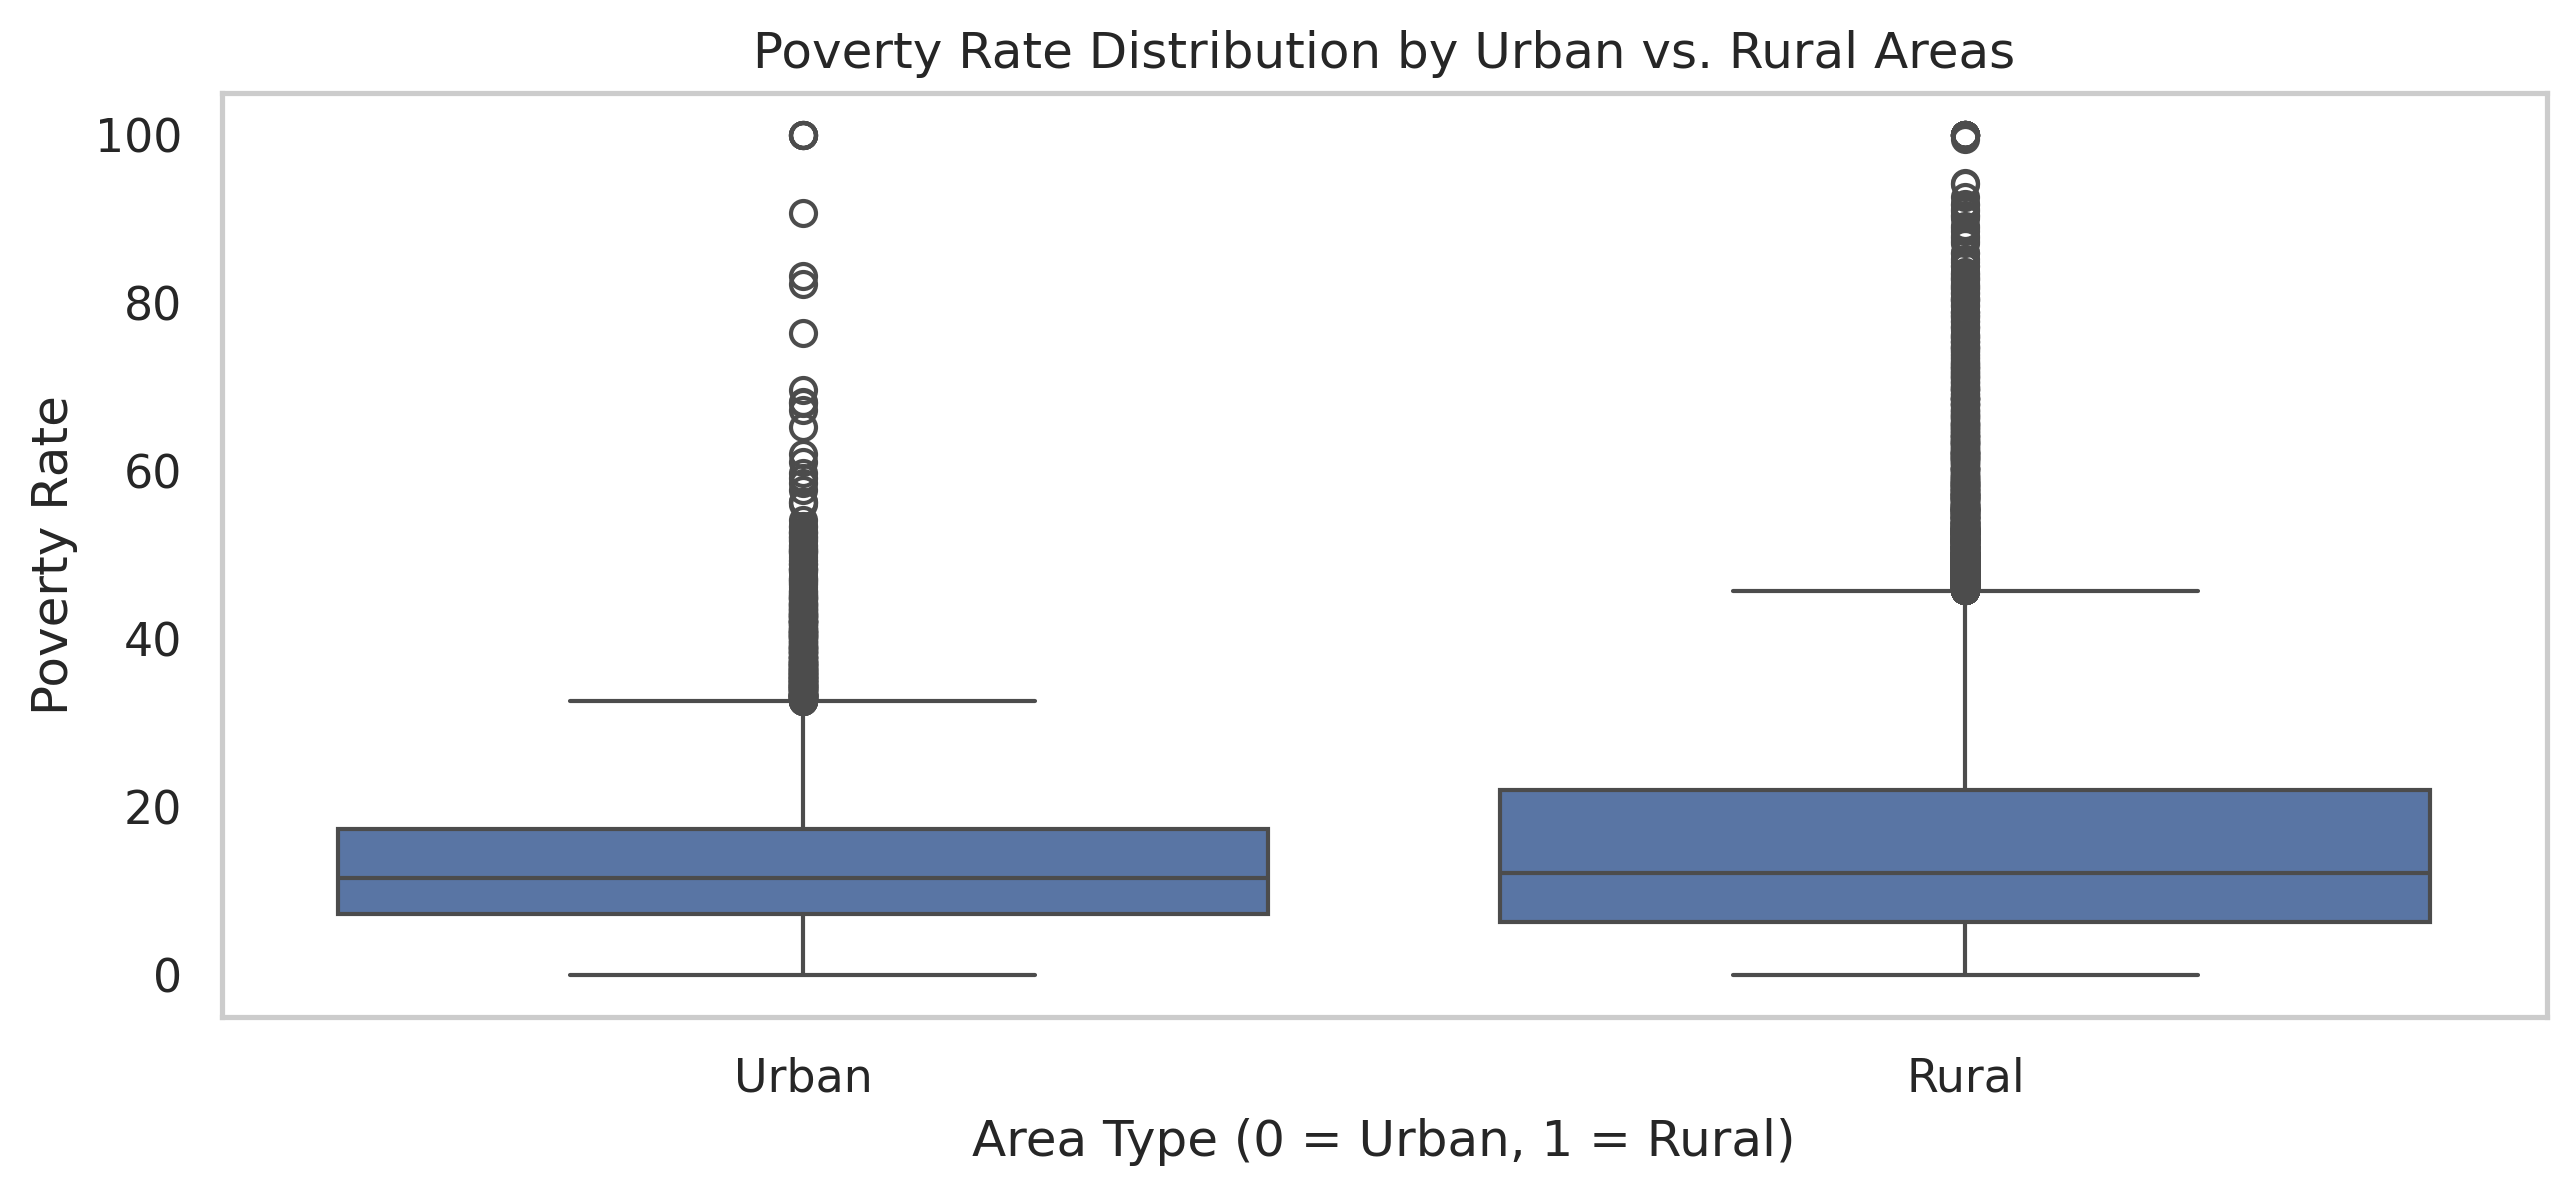

In [39]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 4), dpi=300)
sns.boxplot(x='Urban', y='PovertyRate', data=data)
plt.title('Poverty Rate Distribution by Urban vs. Rural Areas')
plt.xlabel('Area Type (0 = Urban, 1 = Rural)')
plt.ylabel('Poverty Rate')
plt.xticks([0, 1], ['Urban','Rural'])
plt.grid(axis='y')
plt.show()

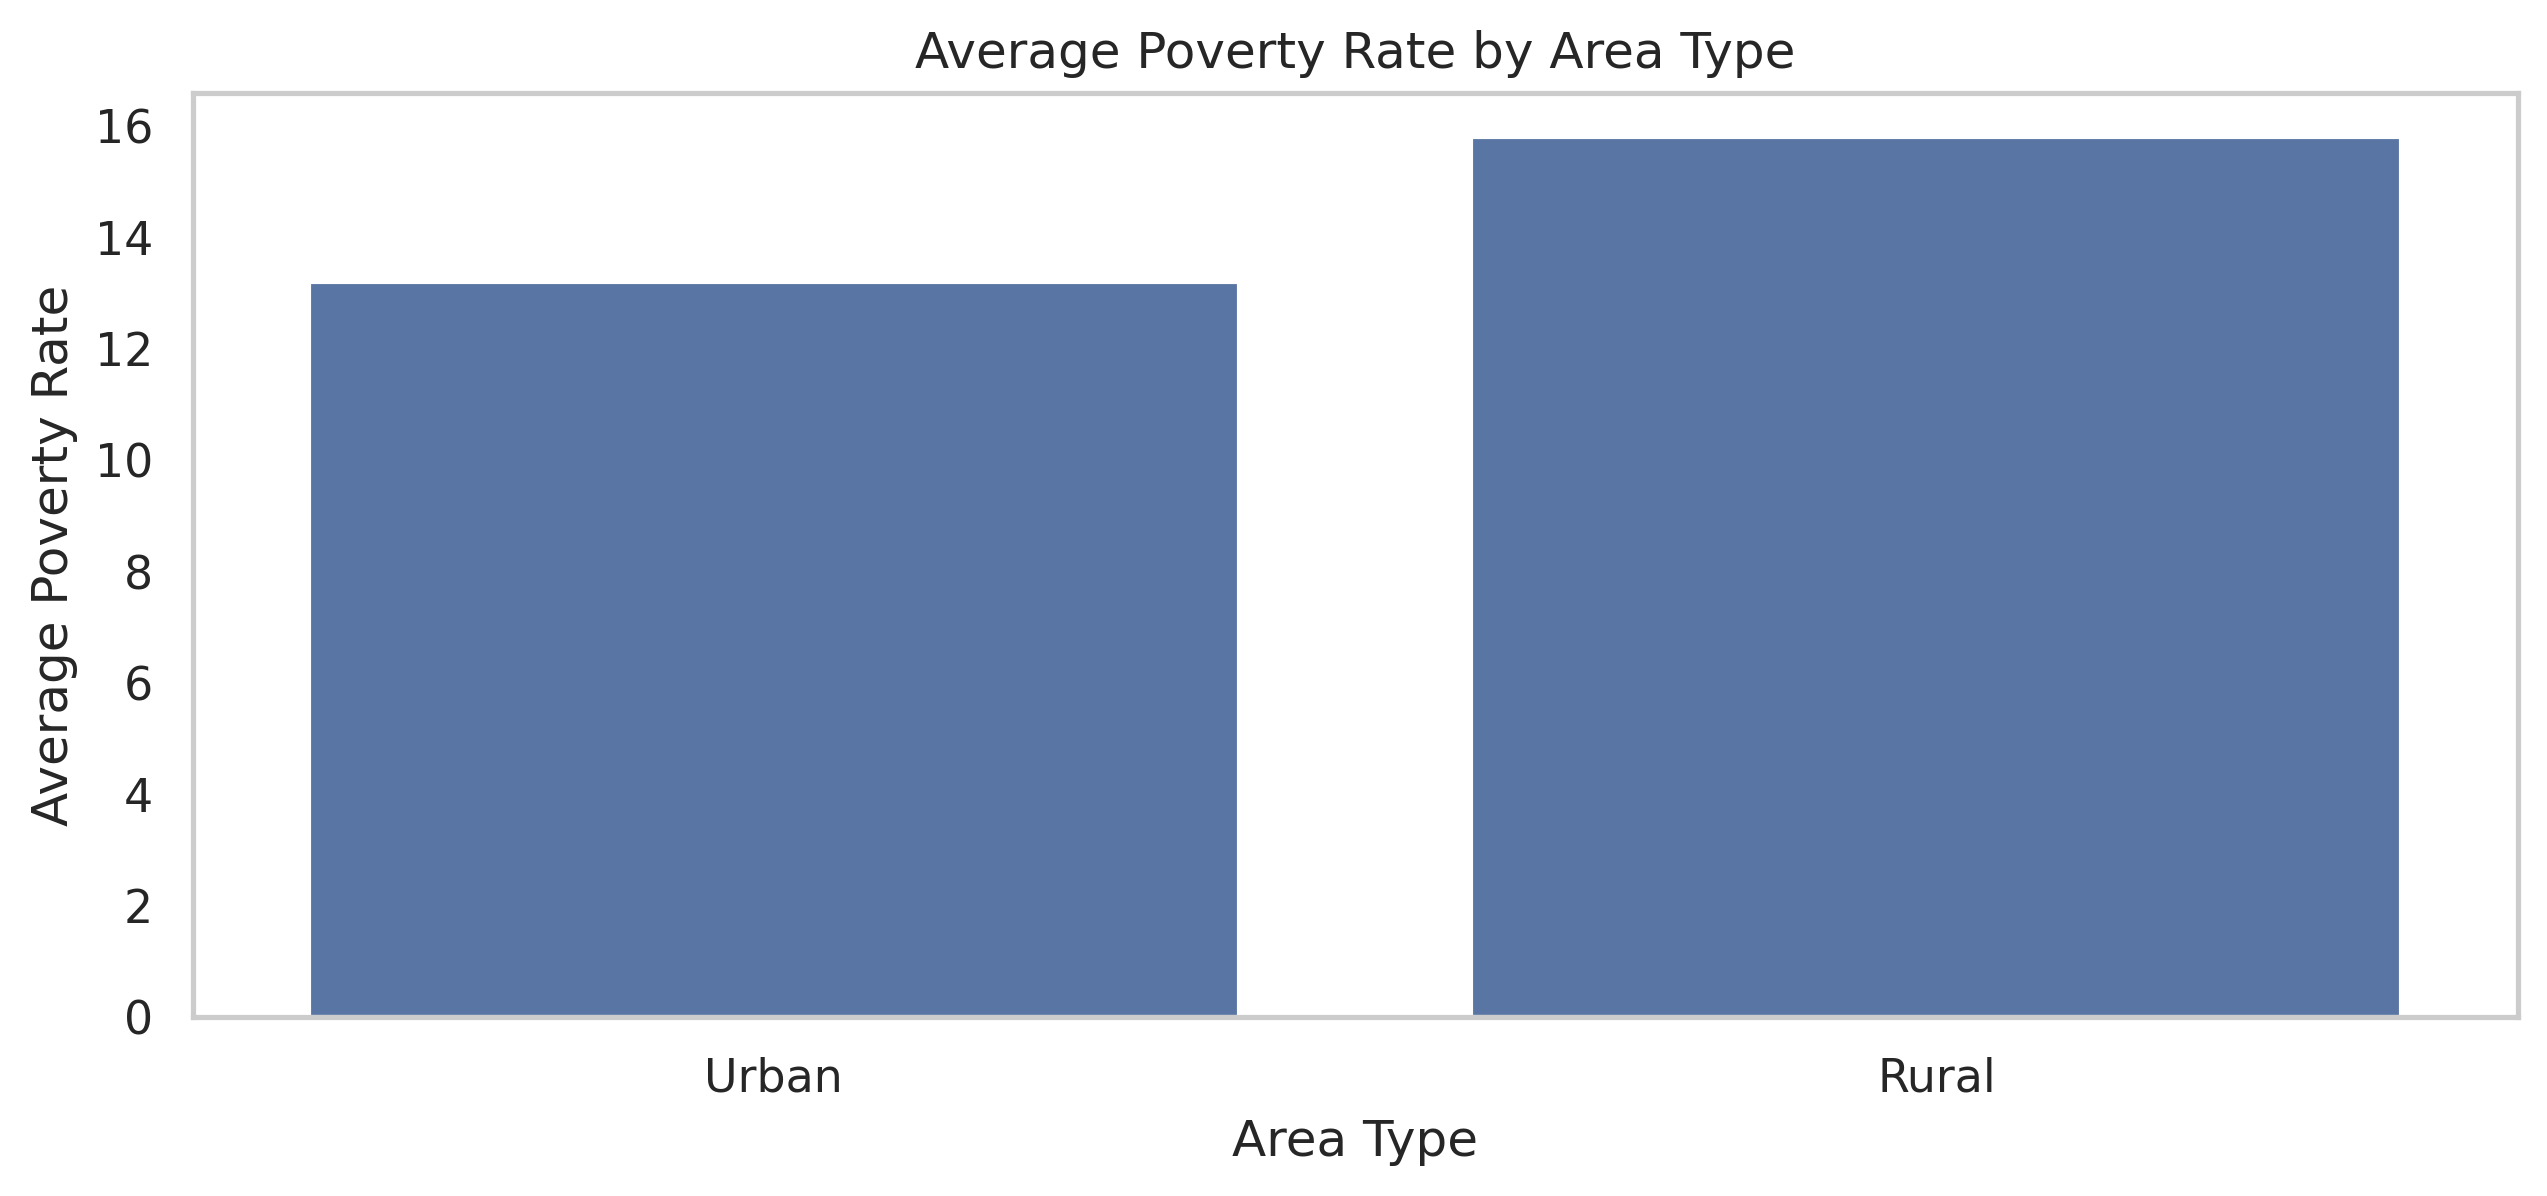

In [41]:
plt.figure(figsize=(10, 4), dpi=300)
avg_poverty = data.groupby('Urban')['PovertyRate'].mean().reset_index()
sns.barplot(x='Urban', y='PovertyRate', data=avg_poverty)
plt.title('Average Poverty Rate by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Average Poverty Rate')
plt.xticks([0, 1], ['Urban', 'Rural'])
plt.grid(axis='y')
plt.show()

**Food Access Analysis**

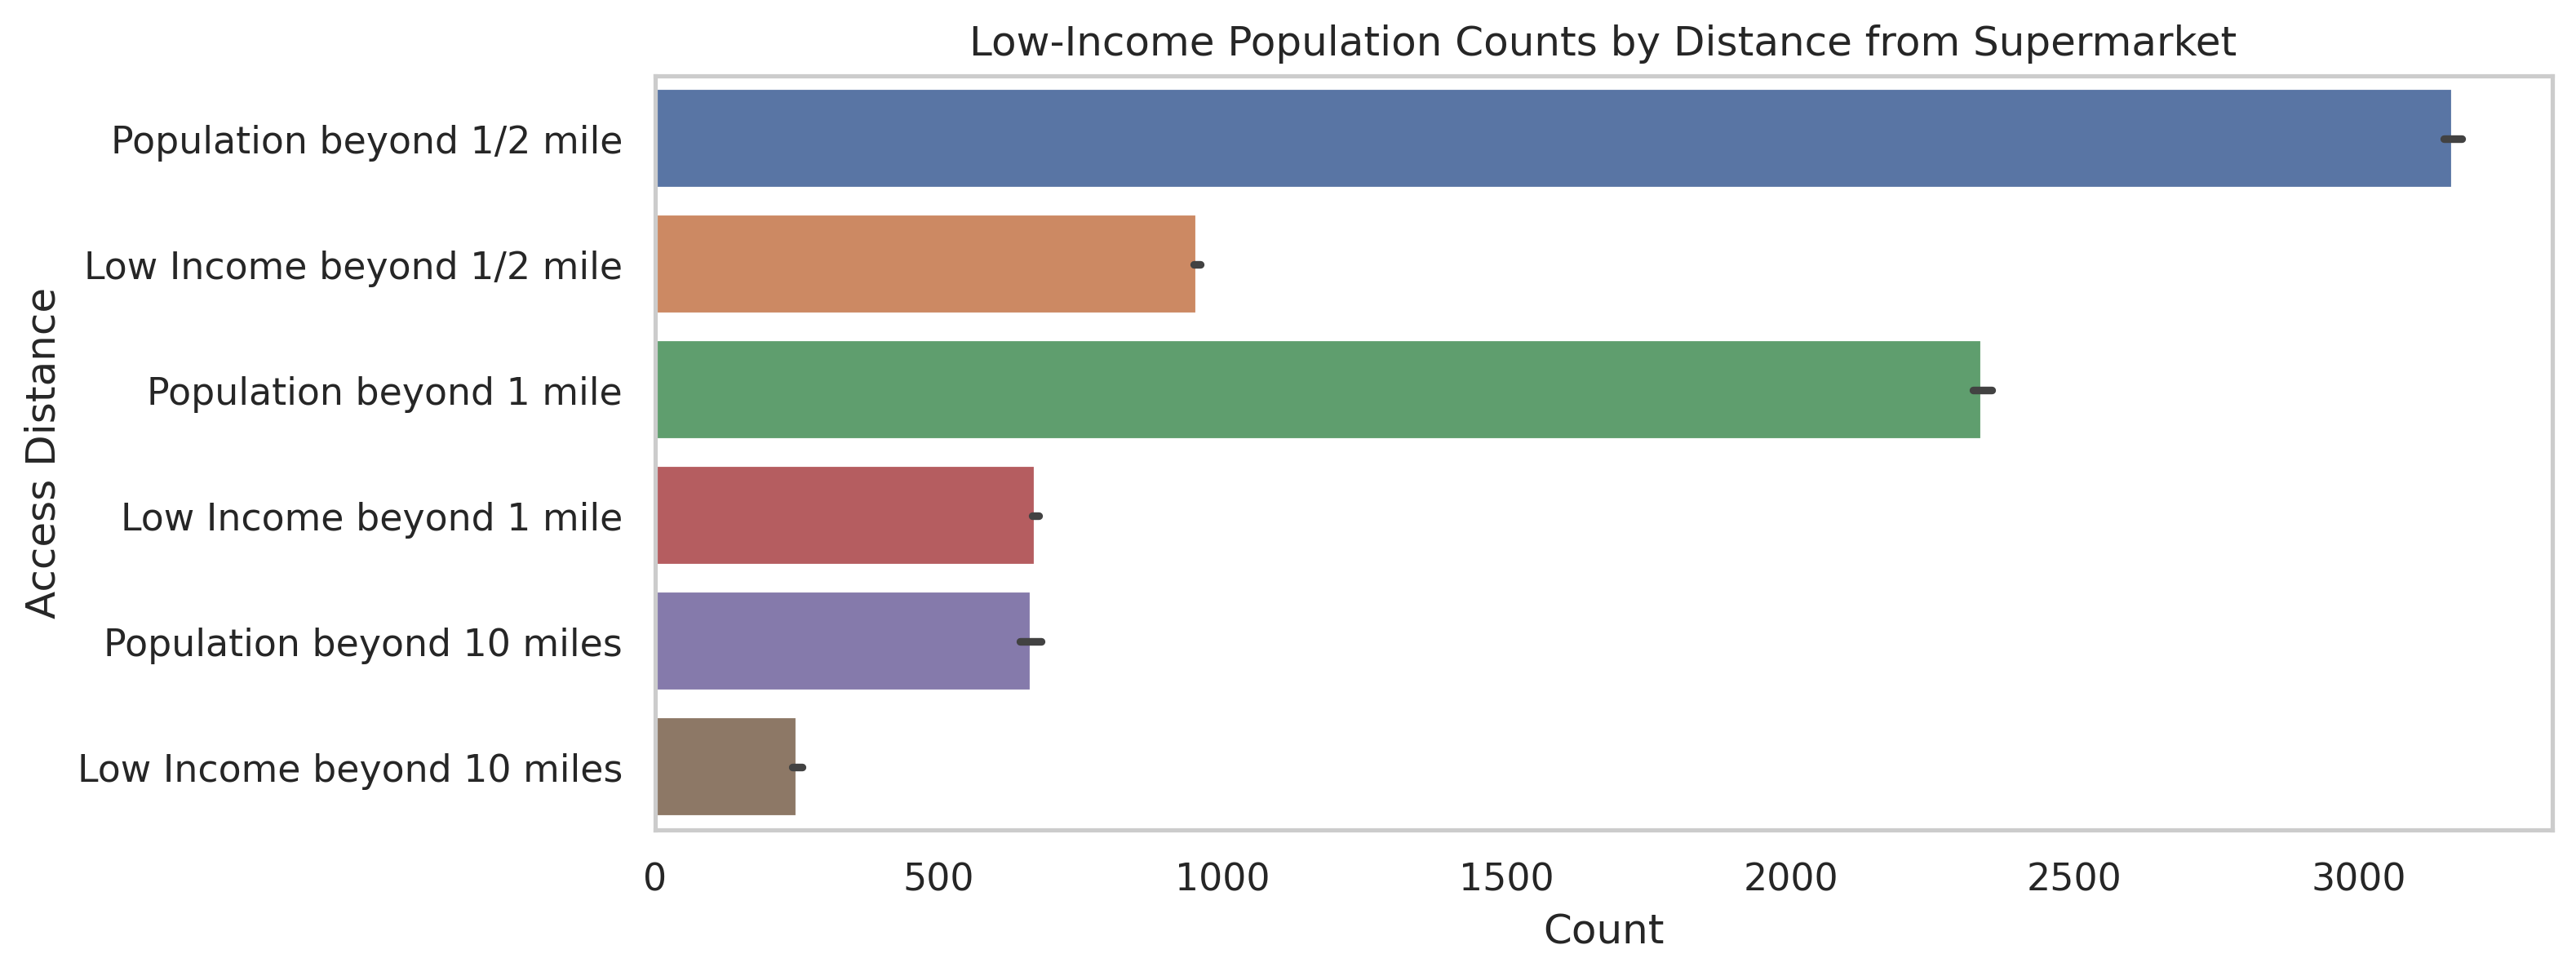

In [20]:
# Create a DataFrame for food access analysis
access_data = data[['lapophalf', 'lalowihalf', 'lapop1', 'lalowi1', 'lapop10', 'lalowi10']].copy()
access_data.columns = ['Population beyond 1/2 mile', 'Low Income beyond 1/2 mile',
                       'Population beyond 1 mile', 'Low Income beyond 1 mile',
                       'Population beyond 10 miles', 'Low Income beyond 10 miles']

# Melt the DataFrame for easier plotting
access_data_melted = access_data.melt(var_name='Access Distance', value_name='Count')

plt.figure(figsize=(10, 4), dpi=300)
sns.barplot(y='Access Distance', x='Count', hue='Access Distance', data=access_data_melted)
plt.title('Low-Income Population Counts by Distance from Supermarket')
plt.xlabel('Count')
plt.grid(axis='x')
plt.show()

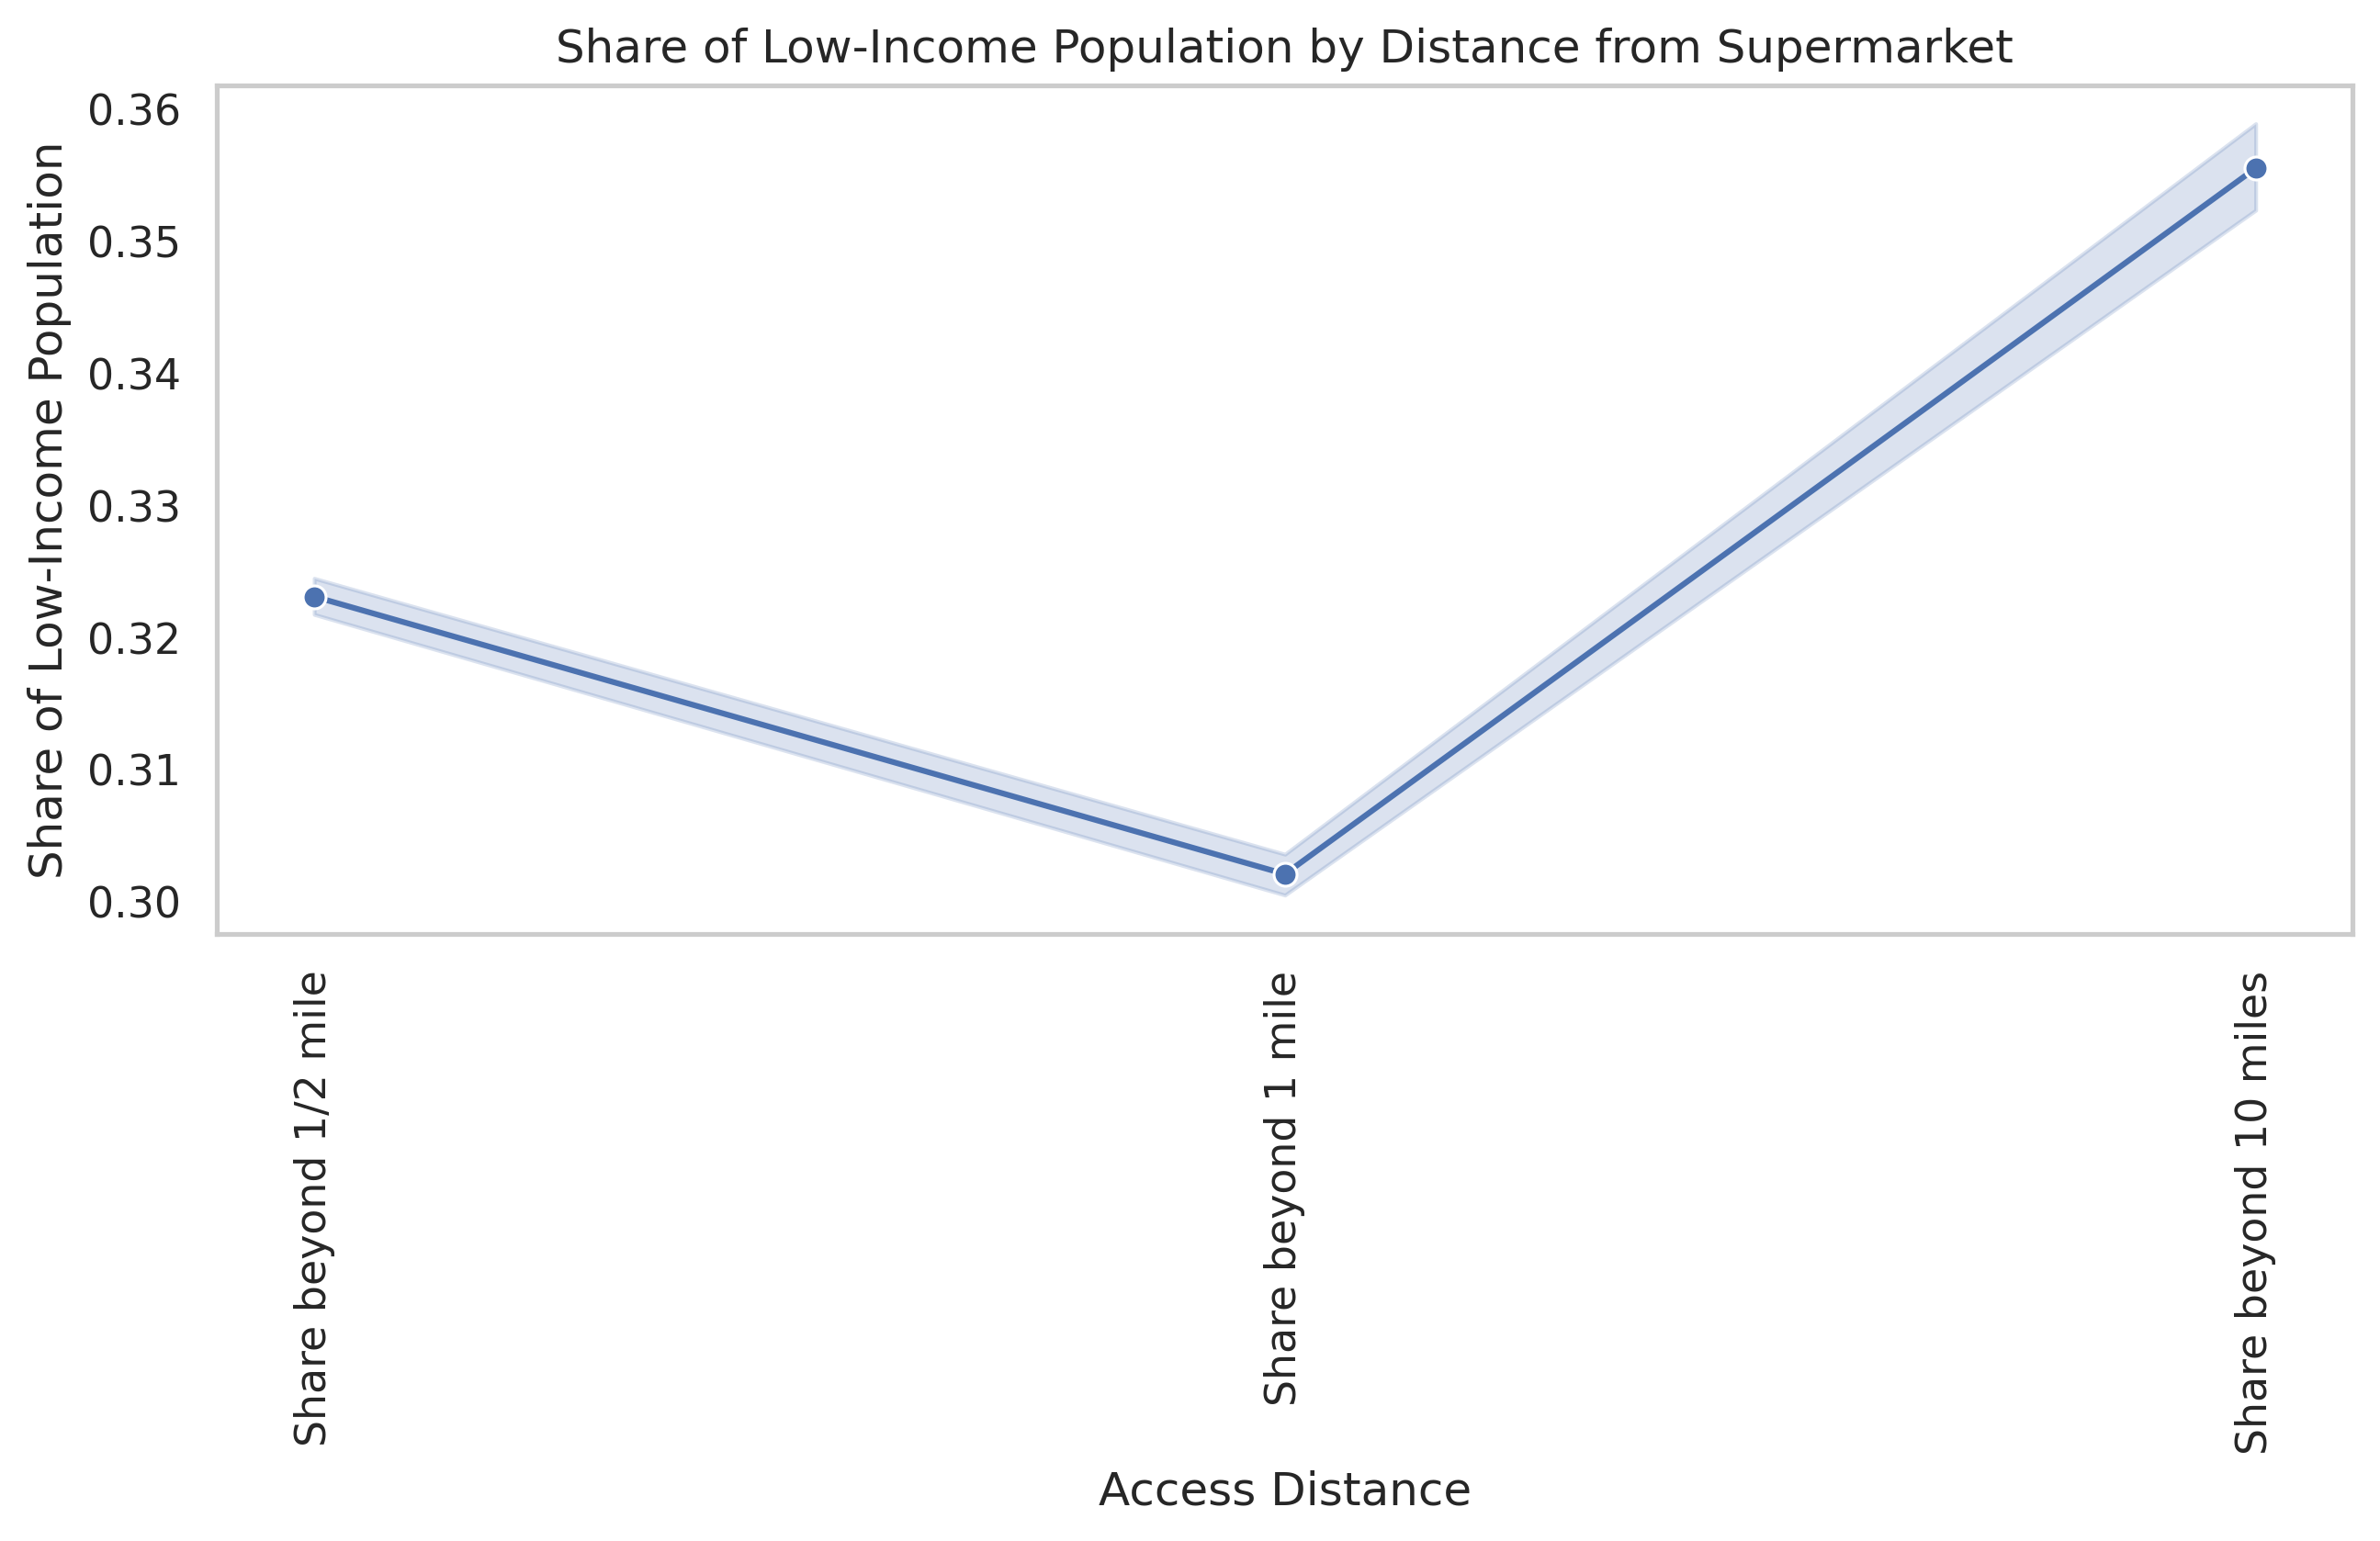

In [22]:
# Calculate the share of low-income populations at different distances
access_data['Low Income Share 1/2 mile'] = access_data['Low Income beyond 1/2 mile'] / access_data['Population beyond 1/2 mile']
access_data['Low Income Share 1 mile'] = access_data['Low Income beyond 1 mile'] / access_data['Population beyond 1 mile']
access_data['Low Income Share 10 miles'] = access_data['Low Income beyond 10 miles'] / access_data['Population beyond 10 miles']

# Melt for share visualization
share_data = access_data[['Low Income Share 1/2 mile', 'Low Income Share 1 mile', 'Low Income Share 10 miles']].copy()
share_data.columns = ['Share beyond 1/2 mile', 'Share beyond 1 mile', 'Share beyond 10 miles']
share_data_melted = share_data.melt(var_name='Access Distance', value_name='Share')

plt.figure(figsize=(10, 4), dpi=300)
sns.lineplot(data=share_data_melted, x='Access Distance', y='Share', marker='o')
plt.title('Share of Low-Income Population by Distance from Supermarket')
plt.ylabel('Share of Low-Income Population')
plt.xticks(rotation=90)
plt.grid()
plt.show()

**Vehicle Access Analysis**

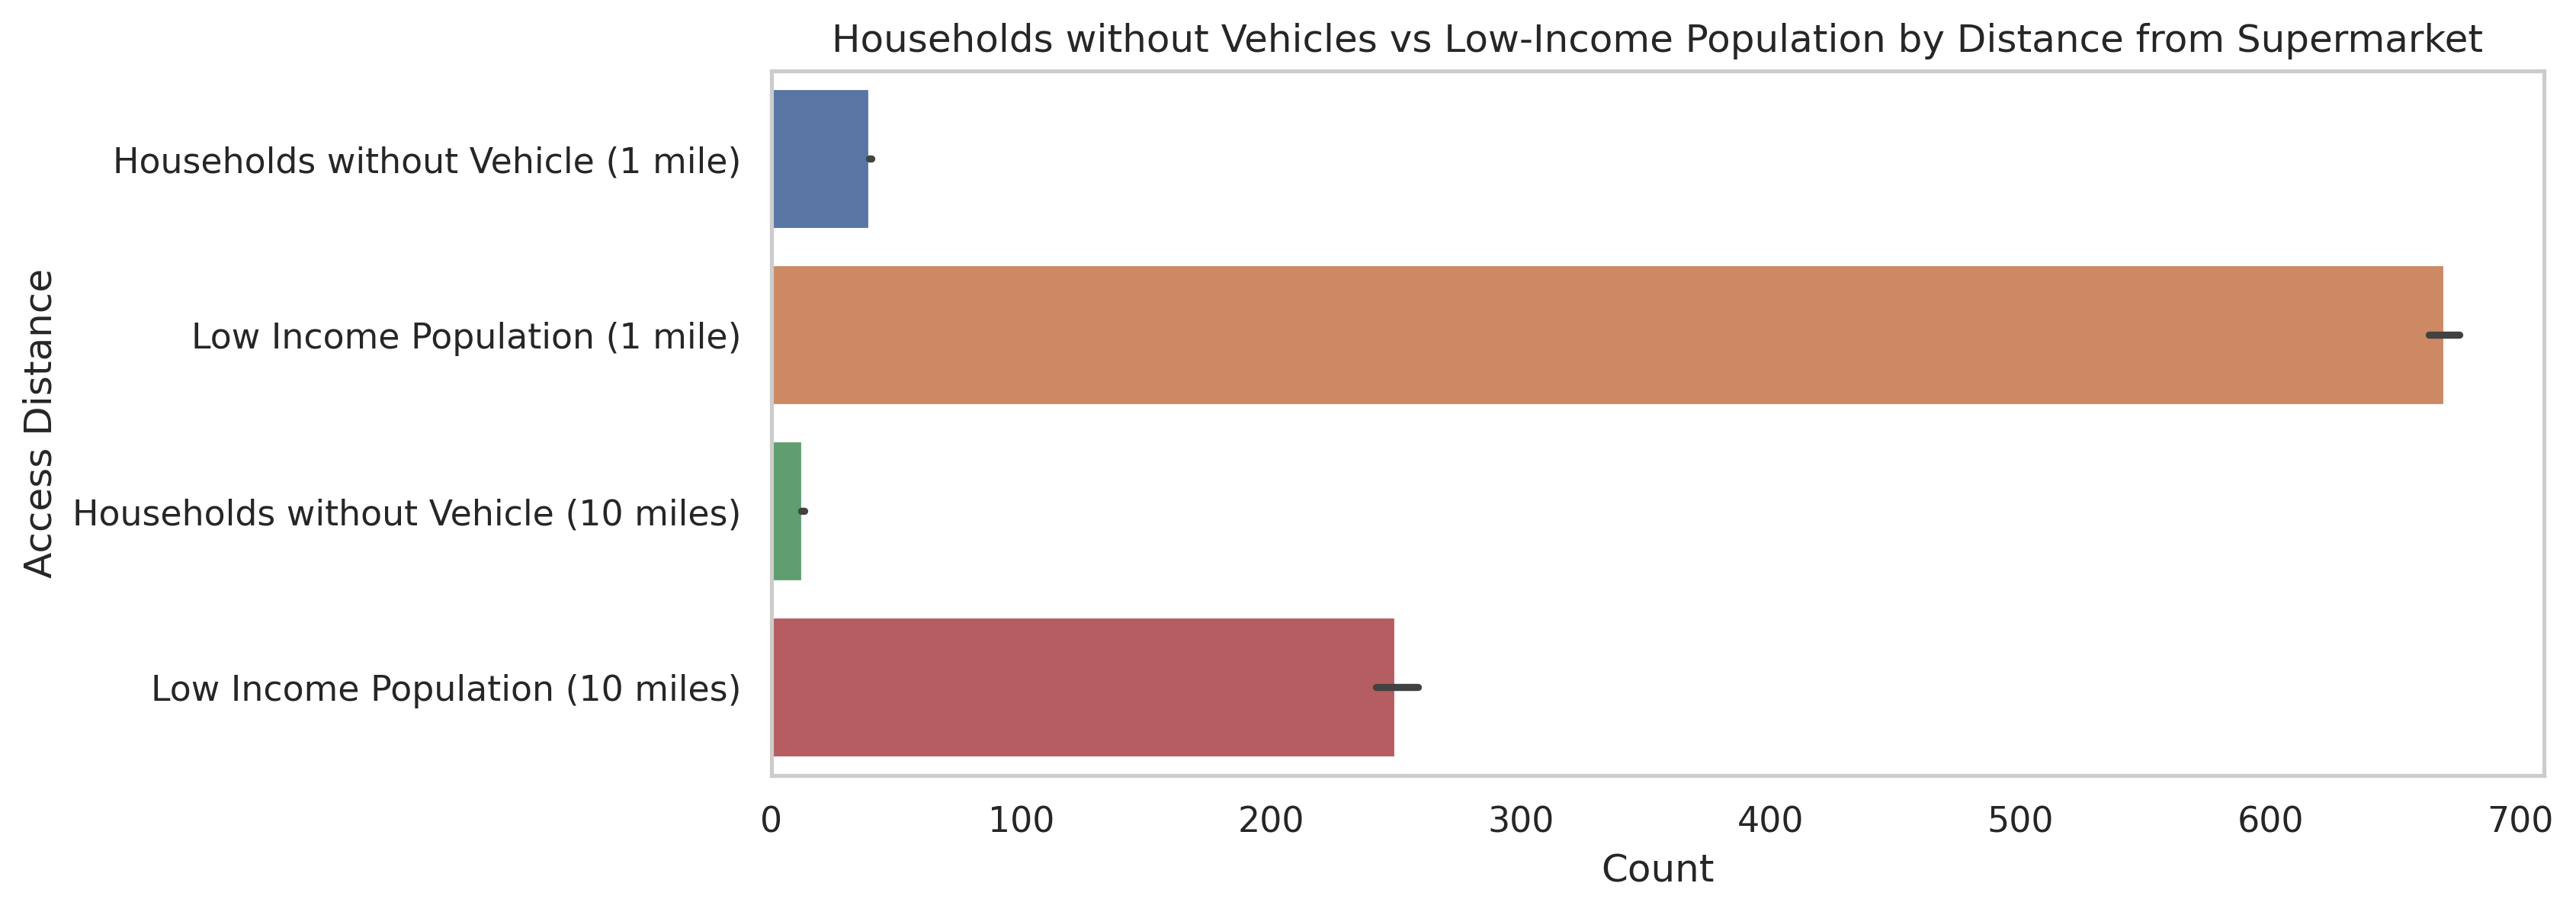

In [25]:
vehicle_data = data[['lahunv1', 'lalowi1', 'lahunv10', 'lalowi10']].copy()
vehicle_data.columns = ['Households without Vehicle (1 mile)',
                        'Low Income Population (1 mile)',
                        'Households without Vehicle (10 miles)',
                        'Low Income Population (10 miles)']

vehicle_data_melted = vehicle_data.melt(var_name='Access Distance', value_name='Count')

plt.figure(figsize=(10, 4), dpi=300)
sns.barplot(y='Access Distance', x='Count', hue='Access Distance', data=vehicle_data_melted)
plt.title('Households without Vehicles vs Low-Income Population by Distance from Supermarket')
plt.xlabel('Count')
plt.grid(axis='x')
plt.show()

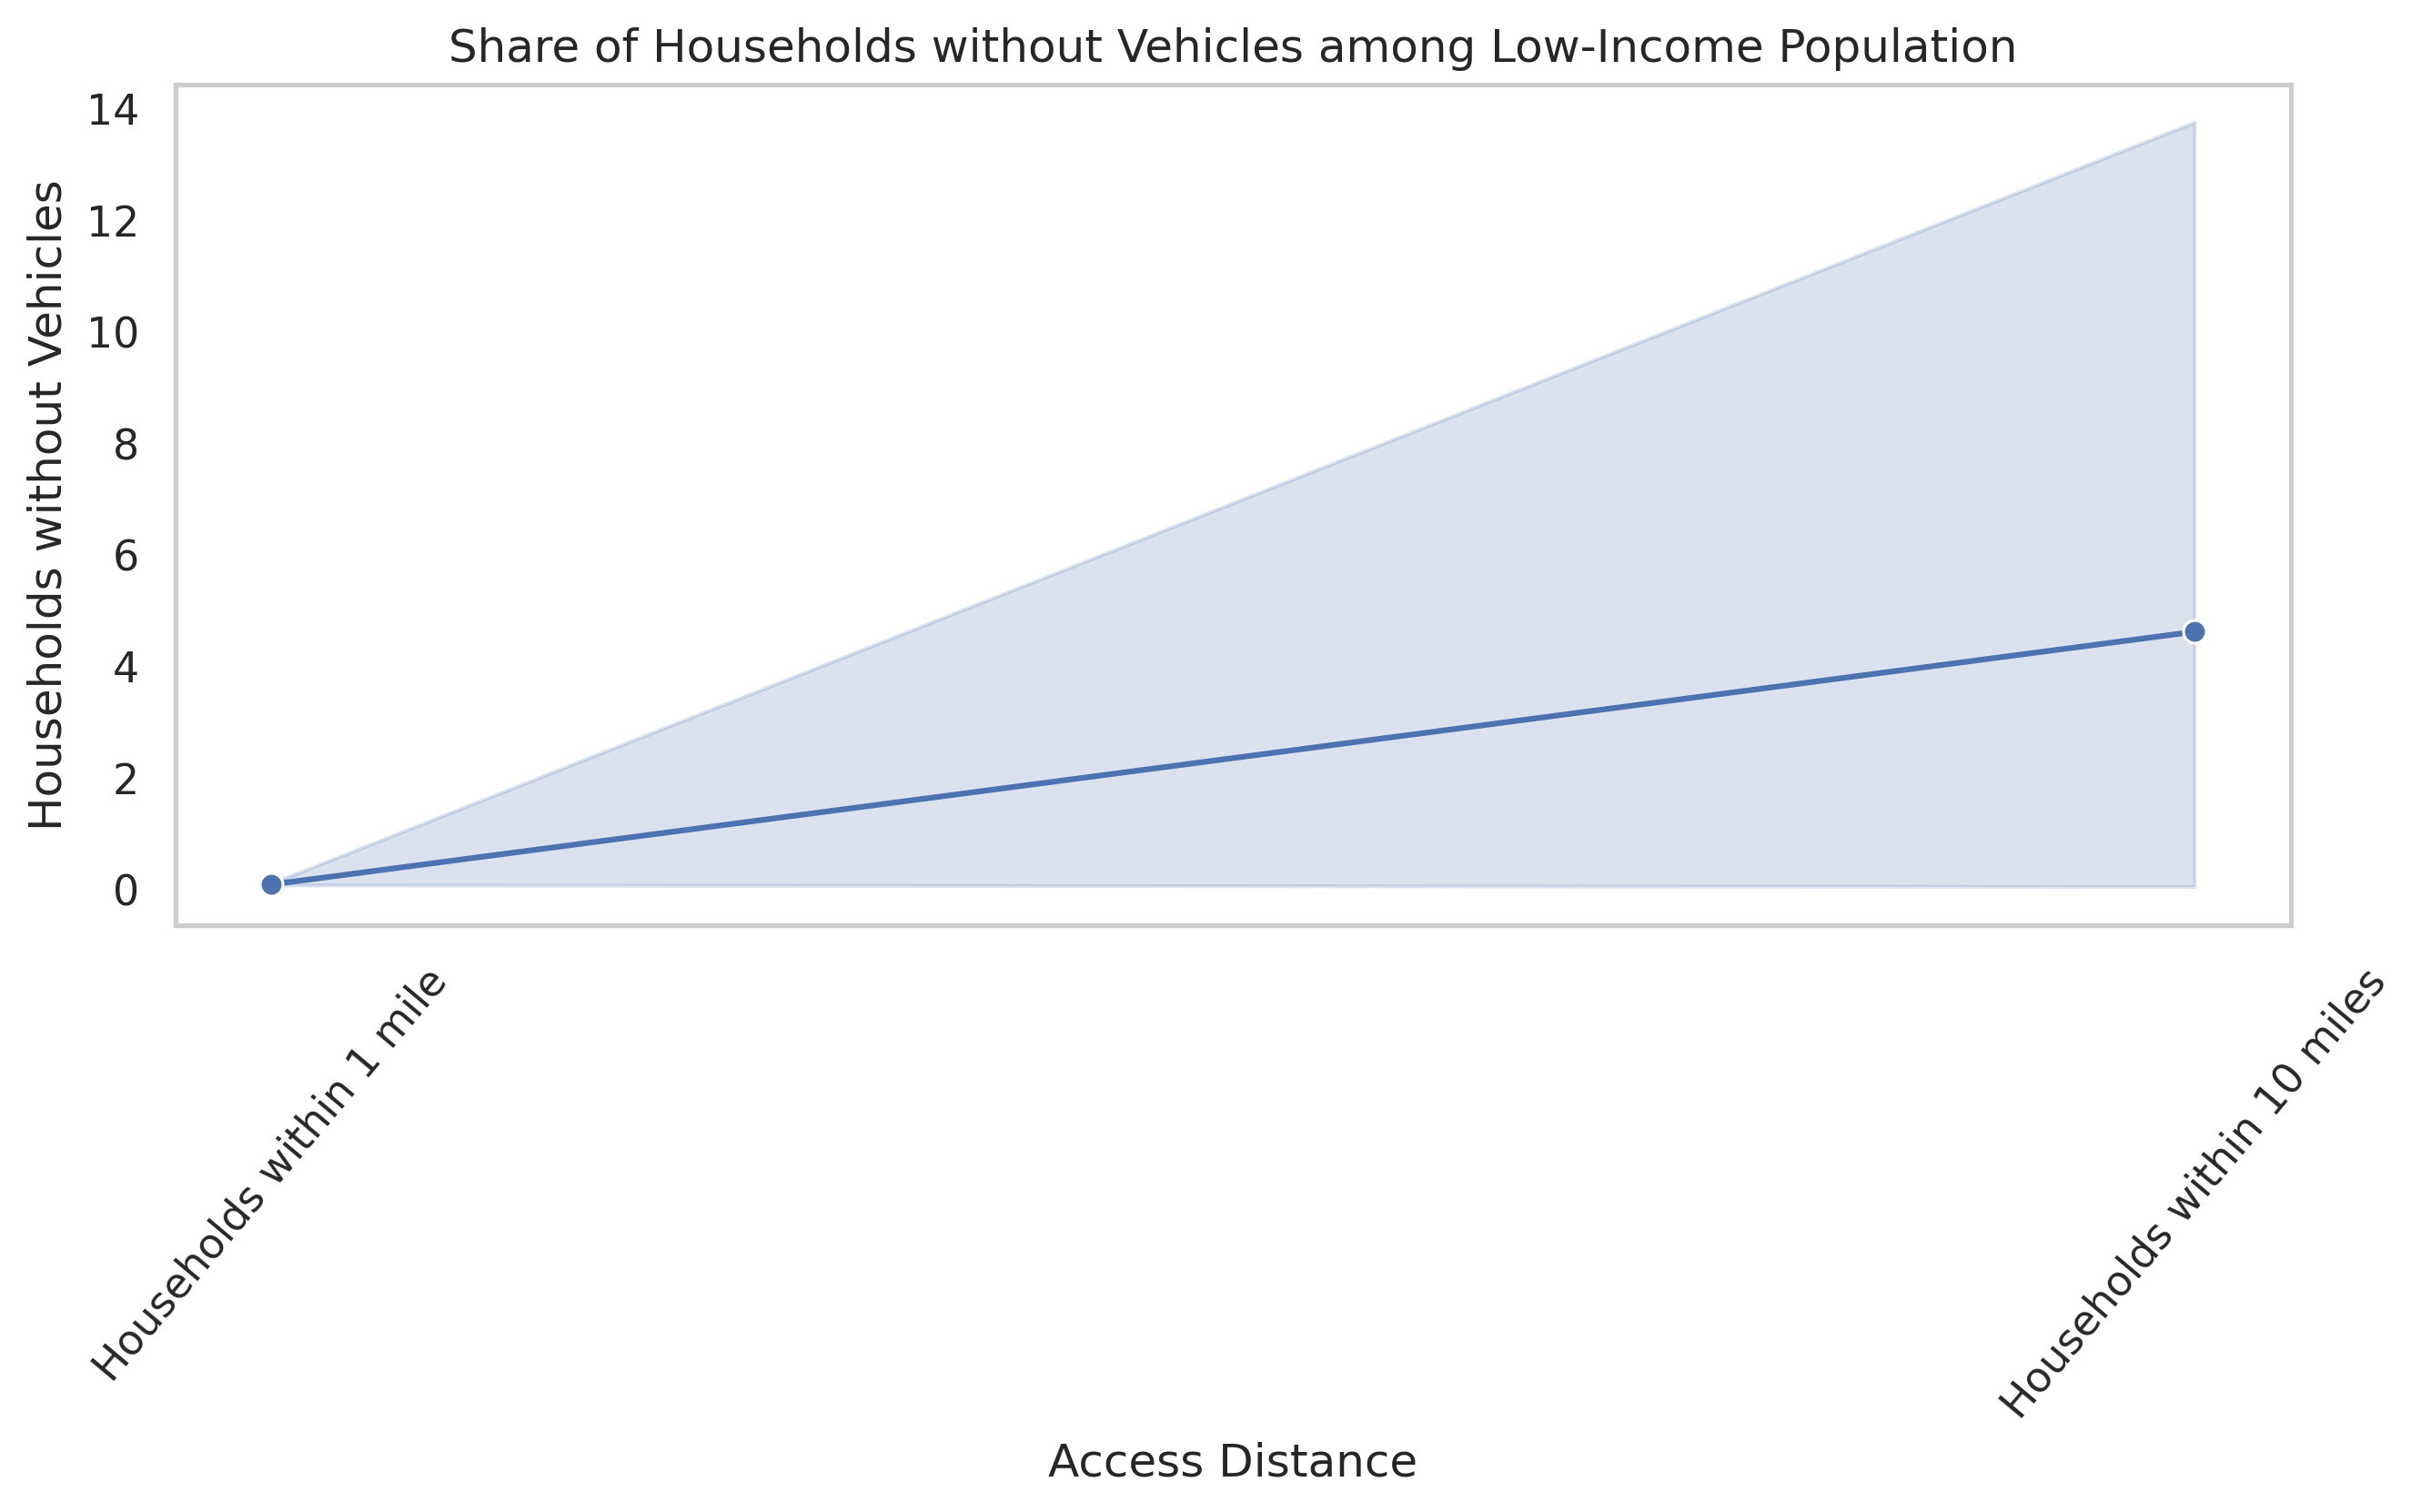

In [38]:
# Calculate the share of households without vehicles at different distances
vehicle_data['Household Share 1 mile'] = vehicle_data['Households without Vehicle (1 mile)'] / vehicle_data['Low Income Population (1 mile)']
vehicle_data['Household Share 10 miles'] = vehicle_data['Households without Vehicle (10 miles)'] / vehicle_data['Low Income Population (10 miles)']

share_data = vehicle_data[['Household Share 1 mile', 'Household Share 10 miles']].copy()
share_data.columns = ['Households within 1 mile', 'Households within 10 miles']
share_data_melted = share_data.melt(var_name='Access Distance', value_name='Share')

plt.figure(figsize=(10, 4), dpi=300)
sns.lineplot(data=share_data_melted, x='Access Distance', y='Share', marker='o')
plt.title('Share of Households without Vehicles among Low-Income Population')
plt.ylabel('Households without Vehicles')
plt.xticks(rotation=50)
plt.grid()
plt.show()

# **Step-03: Conclusion**

- **Disparities in Poverty Rates:** The analysis revealed significant differences in poverty rates between urban and rural areas, highlighting the need for targeted interventions in rural communities where poverty is more prevalent.

- **Food Access Challenges:** Low-income populations face substantial barriers to food access, particularly as distance from supermarkets increases, indicating a critical need for improved transportation and grocery accessibility.

- **Vehicle Access Issues:** A notable share of households without vehicles is concentrated in low-income populations, further exacerbating food insecurity and limiting access to essential services.

- **Policy Implications:** These findings underscore the importance of data-driven policies aimed at enhancing food and vehicle access, particularly in underserved areas, to promote equity and improve overall community health.

- **Future Research Directions:** Continued research should explore the intersections of poverty, food access, and transportation to develop comprehensive strategies that address the multifaceted nature of these issues.